In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV, parse dates, and set index
shopify_df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\2\02-Stu_Stationarity\Resources\shopify.csv'), 
                         parse_dates=True, 
                         index_col='Date')

# Display top rows
shopify_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03 16:00:00,58.22,58.40,56.60,57.65,83632
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175


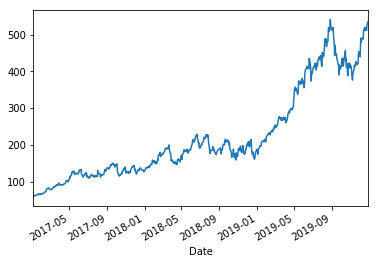

In [4]:
# Plot closing price
shopify_df["Close"].plot()

In [6]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller

adfuller(shopify_df["Close"])

(0.5441995601733082,
 0.9861563642337198,
 11,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 5005.111139326224)

In [7]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
shopify_df["PCT_Change"] = shopify_df["Close"].pct_change()

shopify_df.head()

,Open,High,Low,Close,Volume,PCT_Change
Date,,,,,,
2017-01-03 16:00:00,58.22,58.40,56.60,57.65,83632,NaN
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716,0.020989
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222


In [8]:
# Drop the NaNs created by the pct_change function
shopify_df_new = shopify_df.dropna()

shopify_df_new.head()

,Open,High,Low,Close,Volume,PCT_Change
Date,,,,,,
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716,0.020989
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792


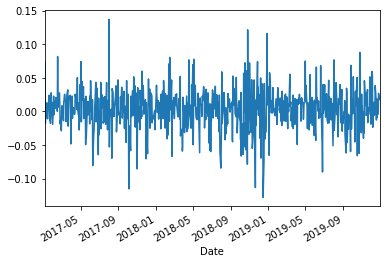

In [10]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data

shopify_df_new["PCT_Change"].plot()

In [11]:
# Subtract the upward trend for the closing prices using the `diff()` function
shopify_df_new["Diff"] = shopify_df_new["Close"].diff()

shopify_df_new.head()

,Open,High,Low,Close,Volume,PCT_Change,Diff
Date,,,,,,,
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716,0.020989,NaN
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80


In [13]:
shopify_df_new = shopify_df_new.dropna()

shopify_df_new.head()

,Open,High,Low,Close,Volume,PCT_Change,Diff
Date,,,,,,,
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340,0.073055,4.30
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40


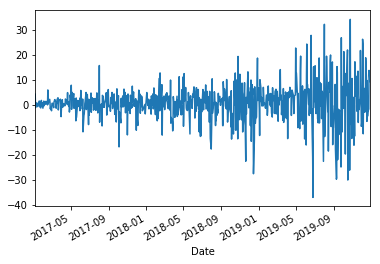

In [14]:
shopify_df_new["Diff"].plot()

In [22]:
# Replace positive/negative inf and drop NaNs
shopify_df_new["log_close"] = np.log(shopify_df_new["Diff"])

shopify_df_new.head()

,Open,High,Low,Close,Volume,PCT_Change,Diff,log_close
Date,,,,,,,,
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457,-0.017891,-1.13,NaN
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51,-0.673345
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80,-0.223144
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40,-0.916291
2017-01-12 16:00:00,64.00,64.00,62.56,63.83,79687,0.001412,0.09,-2.407946


In [23]:
shopify_df_new = shopify_df_new.dropna()

shopify_df_new.head()

,Open,High,Low,Close,Volume,PCT_Change,Diff,log_close
Date,,,,,,,,
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175,0.008222,0.51,-0.673345
2017-01-10 16:00:00,62.44,64.74,62.28,63.34,131031,0.012792,0.80,-0.223144
2017-01-11 16:00:00,63.75,64.47,62.56,63.74,144239,0.006315,0.40,-0.916291
2017-01-12 16:00:00,64.00,64.00,62.56,63.83,79687,0.001412,0.09,-2.407946
2017-01-16 16:00:00,63.82,64.00,63.30,64.00,30407,0.013621,0.86,-0.150823


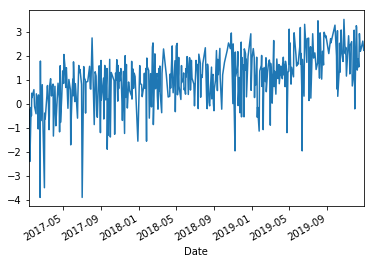

In [24]:
shopify_df_new["log_close"].plot()